In [201]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import datetime

In [202]:
file='sim_factory_2.csv'
cols=['Timestamp',\
      'Plant','PlantStatus','PlantYield', 'PlantDefectiveProducts','PlantEnergyConsumption (kW)', \
      'Machine','MachineStatus','MachineEnergyConsumption (kW)', 'MachineFaultProb', 'MachineBreakDownProb', 'MachineDefectsRate', 'MachineYield', 'MachineNoise' ,\
      'MachineCyclicMaintenance','MachineCorrectiveMaintenance','MachineProactiveMaintenance']

In [203]:
df = pd.read_csv(file, low_memory=False, names=cols)
df

,Timestamp,Plant,PlantStatus,PlantYield,PlantDefectiveProducts,PlantEnergyConsumption (kW),Machine,MachineStatus,MachineEnergyConsumption (kW),MachineFaultProb,MachineBreakDownProb,MachineDefectsRate,MachineYield,MachineNoise,MachineCyclicMaintenance,MachineCorrectiveMaintenance,MachineProactiveMaintenance
0,2020-01-01 01:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN
1,2020-01-01 01:00:00,p1,1,1500,30.0,20000,m2,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN
2,2020-01-01 02:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN
3,2020-01-01 02:00:00,p1,1,1500,30.0,20000,m2,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN
4,2020-01-01 03:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38419,2022-03-11 10:00:00,p1,1,1500,30.0,20000,m2,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN
38420,2022-03-11 11:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN
38421,2022-03-11 11:00:00,p1,1,1500,30.0,20000,m2,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN
38422,2022-03-11 12:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN


In [204]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df=df.fillna('-')

In [205]:
df1=df[df['Timestamp']<datetime.datetime.strptime('2021-01-01','%Y-%m-%d')]
df2=df[( df['Timestamp']>=datetime.datetime.strptime('2021-01-01','%Y-%m-%d')) & (df['Timestamp']<datetime.datetime.strptime('2022-01-01','%Y-%m-%d'))]

## Number of Maintenance Interventions

In [206]:
def get_maintenance_number(df,column,control_df):
    maint=df[column].unique()
    try:
        n_maint=int(maint[-1][-5:]) -1 
    except:
        n_maint=0
    try:
        init_maint=int(control_df[column].unique()[-1][-5:]) -1
        control_maint=control_df[column]
        maint = [m for m in maint if m not in control_maint]
        n_maint=int(maint[-1][-5:]) -1  - init_maint
    except:
        print('no need to check previous timeframe')
    
    return n_maint

In [207]:
height=[]    
maint_type=['MachineCyclicMaintenance','MachineCorrectiveMaintenance','MachineProactiveMaintenance']
height.append(get_maintenance_number(df1,maint_type[0],None))
height.append(get_maintenance_number(df1,maint_type[1],None))
height.append(get_maintenance_number(df1,maint_type[2],None))
height.append(get_maintenance_number(df2,maint_type[0],df1))
height.append(get_maintenance_number(df2,maint_type[1],df1))
height.append(get_maintenance_number(df2,maint_type[2],None))

no need to check previous timeframe
no need to check previous timeframe
no need to check previous timeframe
no need to check previous timeframe


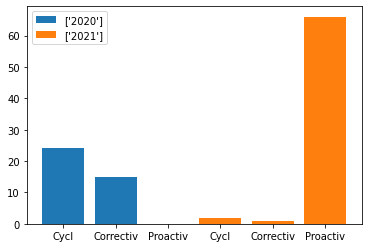

In [208]:
plt.figure()
maint_label=[ t.strip('Machine').strip('Maintenance') for t in maint_type]

plt.bar([1,2,3], height[:3], width=0.8, align='center', tick_label=['Cyclic','Corrective','Proactive' ],label=['2020'])
plt.bar([4,5,6], height[3:], width=0.8, align='center', label=['2021'])
plt.legend()
plt.xticks([1,2,3,4,5,6],[t for t in maint_label]*2)
plt.show()

## Cost of Maintenance Interventions

In [209]:
corrective_cost = 10000
regular_maintenance_cost =1000

In [210]:
cost=[m * regular_maintenance_cost for m in height]
cost[1]=cost[1]*corrective_cost/regular_maintenance_cost
cost[4]=cost[4]*corrective_cost/regular_maintenance_cost

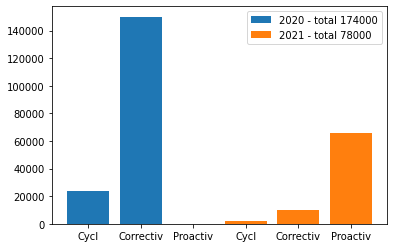

In [211]:
plt.figure()
maint_label=[ t.strip('Machine').strip('Maintenance') for t in maint_type]

plt.bar([1,2,3], cost[:3], width=0.8, align='center', tick_label=['Cyclic','Corrective','Proactive' ],label='2020 - total '+str(int(np.sum(cost[:3]))))
plt.bar([4,5,6], cost[3:], width=0.8, align='center',label='2021 - total '+str(int(np.sum(cost[3:]))))
plt.legend()
plt.xticks([1,2,3,4,5,6],[t for t in maint_label]*2)
plt.show()

## Cost of Maintenance per Product

In [212]:
yield_20=df1[['Timestamp','Plant','PlantYield']].drop_duplicates()['PlantYield'].sum()
yield_21=df2[['Timestamp','Plant','PlantYield']].drop_duplicates()['PlantYield'].sum()
print(yield_20,yield_21)

10303500 10714500


In [213]:
cost_per_product= [cost[i]/yield_20 for i in range(3) ]+[cost[i]/yield_21 for i in range(3,6) ]

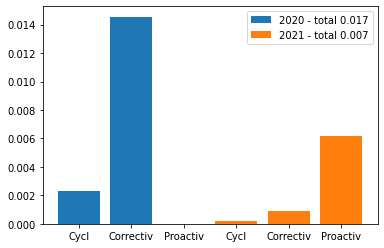

In [214]:
plt.figure()
maint_label=[ t.strip('Machine').strip('Maintenance') for t in maint_type]

plt.bar([1,2,3], cost_per_product[:3], width=0.8, align='center', tick_label=['Cyclic','Corrective','Proactive' ],label='2020 - total '+str(np.round(np.sum(cost_per_product[:3]),3)))
plt.bar([4,5,6], cost_per_product[3:], width=0.8, align='center',label='2021 - total '+str(np.round(np.sum(cost_per_product[3:]),3)))
plt.legend()
plt.xticks([1,2,3,4,5,6],[t for t in maint_label]*2)
plt.show()

## Weekly Trends

In [215]:
df['year_week']=df['Timestamp'].apply(lambda x: str(x.year)+'w'+str(x.week).zfill(2))
df

,Timestamp,Plant,PlantStatus,PlantYield,PlantDefectiveProducts,PlantEnergyConsumption (kW),Machine,MachineStatus,MachineEnergyConsumption (kW),MachineFaultProb,MachineBreakDownProb,MachineDefectsRate,MachineYield,MachineNoise,MachineCyclicMaintenance,MachineCorrectiveMaintenance,MachineProactiveMaintenance,year_week
0,2020-01-01 01:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2020w01
1,2020-01-01 01:00:00,p1,1,1500,30.0,20000,m2,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2020w01
2,2020-01-01 02:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2020w01
3,2020-01-01 02:00:00,p1,1,1500,30.0,20000,m2,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2020w01
4,2020-01-01 03:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2020w01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38419,2022-03-11 10:00:00,p1,1,1500,30.0,20000,m2,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2022w10
38420,2022-03-11 11:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2022w10
38421,2022-03-11 11:00:00,p1,1,1500,30.0,20000,m2,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2022w10
38422,2022-03-11 12:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2022w10


In [216]:
plant_cols=[ c for c in cols if 'Plant' in c ]
machine_cols=[ c for c in cols if 'Machine' in c ]

In [217]:
dfw=df.drop_duplicates(subset=['Timestamp']+plant_cols)
dfw

,Timestamp,Plant,PlantStatus,PlantYield,PlantDefectiveProducts,PlantEnergyConsumption (kW),Machine,MachineStatus,MachineEnergyConsumption (kW),MachineFaultProb,MachineBreakDownProb,MachineDefectsRate,MachineYield,MachineNoise,MachineCyclicMaintenance,MachineCorrectiveMaintenance,MachineProactiveMaintenance,year_week
0,2020-01-01 01:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2020w01
2,2020-01-01 02:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2020w01
4,2020-01-01 03:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2020w01
6,2020-01-01 04:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2020w01
8,2020-01-01 05:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2020w01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38414,2022-03-11 08:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2022w10
38416,2022-03-11 09:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2022w10
38418,2022-03-11 10:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2022w10
38420,2022-03-11 11:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,-,-,-,2022w10


In [218]:
dfw=dfw.groupby(['year_week','Plant'],as_index=False)['PlantYield','PlantDefectiveProducts','PlantEnergyConsumption (kW)'].sum()
dfw['EffectiveYield']=dfw['PlantYield']-dfw['PlantDefectiveProducts']

/var/folders/k0/x2j2_8855vj36bx6g9mnmcs00000gn/T/ipykernel_1533/1574078079.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfw=dfw.groupby(['year_week','Plant'],as_index=False)['PlantYield','PlantDefectiveProducts','PlantEnergyConsumption (kW)'].sum()


In [219]:
dfw['EnergyCons_PP']=dfw['PlantEnergyConsumption (kW)']/dfw['EffectiveYield']

<AxesSubplot:>

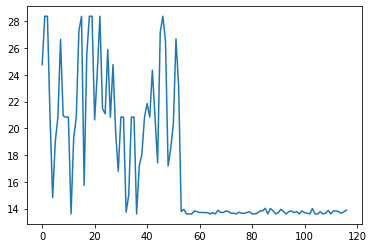

In [220]:
dfw['EnergyCons_PP'].plot()

<AxesSubplot:>

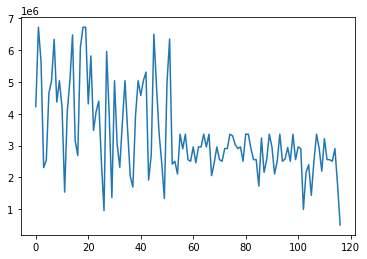

In [221]:
dfw['PlantEnergyConsumption (kW)'].plot()

<AxesSubplot:>

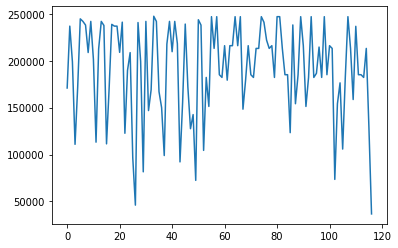

In [222]:
dfw['EffectiveYield'].plot()

In [223]:
dfw[['PlantEnergyConsumption (kW)','EffectiveYield','EnergyCons_PP']]

,PlantEnergyConsumption (kW),EffectiveYield,EnergyCons_PP
0,4230000,170910.0,24.749868
1,6720000,236880.0,28.368794
2,5640000,198810.0,28.368794
3,2310000,110880.0,20.833333
4,2540000,171390.0,14.820001
...,...,...,...
112,2560000,185100.0,13.830362
113,2510000,182190.0,13.776826
114,2910000,213120.0,13.654279
115,1780000,129300.0,13.766435
